In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to display all the rows and columns inside a dataframe
pd.set_option('display.max_rows',None)

In [3]:
# loading and reading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head(20)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


# DATA PREPROCESSING 

In [4]:
# some columns are having spaces at the beginning and end
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
# droping year column as it contains only a single year i.e. 2012
df.drop(columns='year',inplace=True)

In [6]:
# getting index of day
index_day = df[df.day == 'day'].index
# getting index of sidi
index_sidi = df[df.day =='Sidi-Bel Abbes Region Dataset'].index
# dropping the values from dataframe
df.drop([index_day[0],index_sidi[0]],inplace=True)

In [7]:
# all columns are having object as datatype need to replace it with int and float as per the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   Temperature  244 non-null    object
 3   RH           244 non-null    object
 4   Ws           244 non-null    object
 5   Rain         244 non-null    object
 6   FFMC         244 non-null    object
 7   DMC          244 non-null    object
 8   DC           244 non-null    object
 9   ISI          244 non-null    object
 10  BUI          244 non-null    object
 11  FWI          244 non-null    object
 12  Classes      243 non-null    object
dtypes: object(13)
memory usage: 26.7+ KB


In [8]:
df[df.FWI == 'fire   ']
# in DC column the value is 14.6 9 is misplaced from ISI hence changing the values

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
# replacing the values as per columns
df.DC[df.DC == '14.6 9'] = '14.6'
df.ISI[df.DC == '14.6'] = '9'
df.BUI[df.DC == '14.6'] = '12.5'
df.FWI[df.DC == '14.6'] = '10.4'
df.Classes[df.DC == '14.6'] = 'fire'

In [10]:
# changing datatypes of columns to numeric
new_df = df[['day', 'month', 'Temperature', 
         'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].apply(pd.to_numeric)

In [11]:
# dataframe with updated datatypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 24.8 KB


In [12]:
# Class target variable is having spaces
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [13]:
# removing spaces from target variable
df.Classes = df.Classes.str.strip()

In [14]:
# joining Class column to new_df
new_df = new_df.join(df.Classes)

In [15]:
# checking null values if present, No null values are present
new_df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [16]:
# replacing fire with 1 and not fire with 0 
new_df['Classes'] = np.where(new_df['Classes'] == 'not fire', 0, 1)

In [17]:
# final dataframe with proper datatypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    int32  
dtypes: float64(7), int32(1), int64(5)
memory usage: 33.8 KB


In [18]:
# summary of dataset
new_df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Exploratary Data Analysis

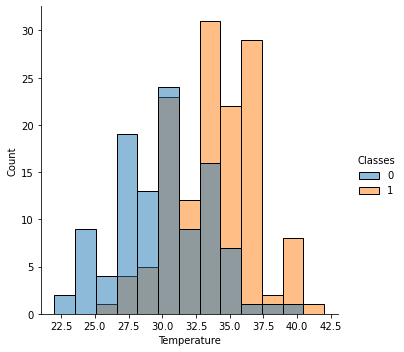

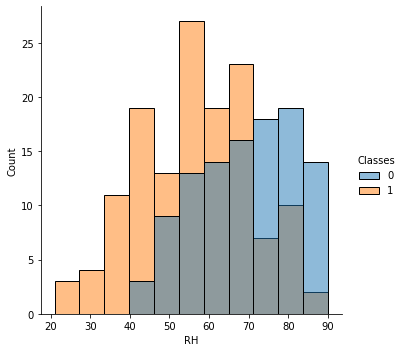

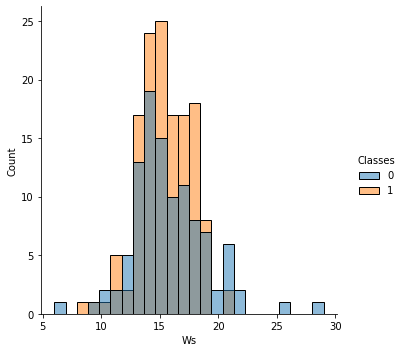

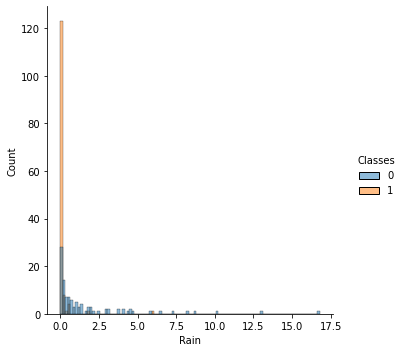

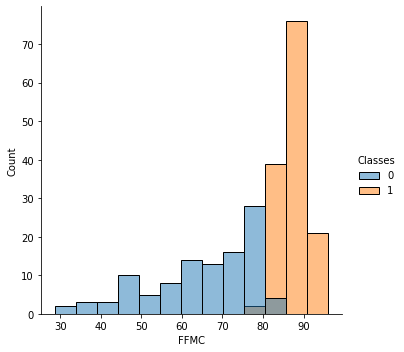

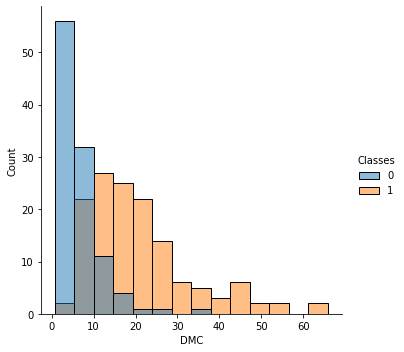

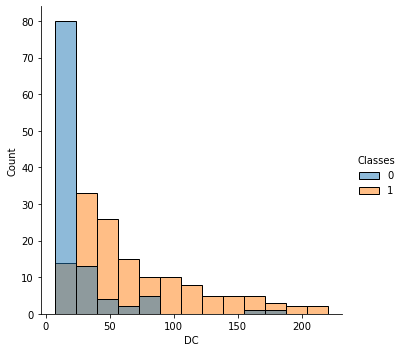

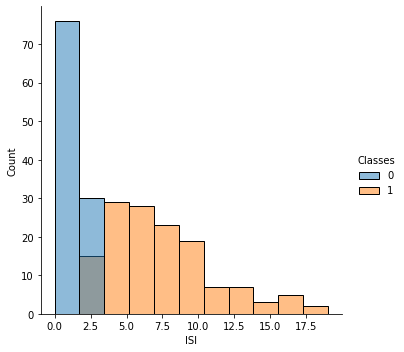

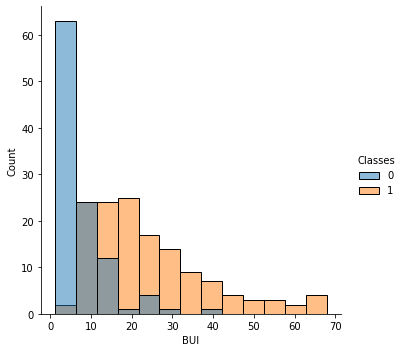

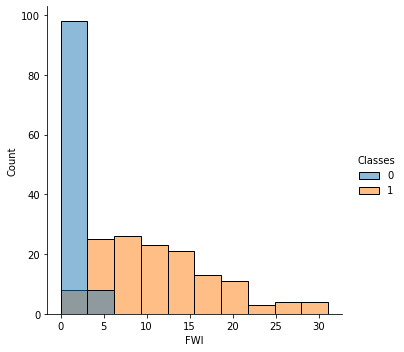

In [19]:
# distribution of columns as per target class
columns = ['day','month','Classes'] # excluding these columns
for i in new_df:  # iterating through columns in dataframe
    if i not in columns:
        sns.displot(x=i,hue='Classes',data=new_df) # displot for distribution with hue parameter as target class
#[i if i in columns else sns.displot(x=i,hue='Class',data=new_df) for i in new_df]

# OBSERVATIONS : 
1. Temperature : Not exactly following guassian distribution(somewhat). Temp > 31 there is more frequency for fire.
2. RH : Normally distibuted. From temp > 40 class 0(not fire) starts
3. Ws : Follows Gaussian distribution.There are some outliers for class 0(not fire) ws > 25.
4. Rain : Right skewed distribution.Most of the records are having 0 value. Having outliers.
5. FFMC : Left skewed distribution. More FFMC more prone to fire(Class 1).
6. DMC : Right skewed distribution.
7. DC : Right skewed distribution.outliers in not fire(class 0).
8. ISI : Right skewed distribution.ISI > 3.5 more prone to (Class 1).
9. BUI : Right skewed distribution. BUI < 5 is more prone to (not fire(Class 0)).
10. FWI : Right skewed distribution.0 < FWI < 5 having high frequency and more prone to (not fire).


 'Temperature',
 'Classes']

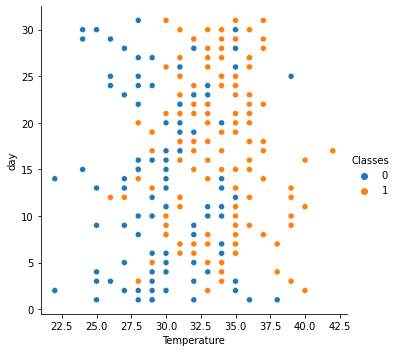

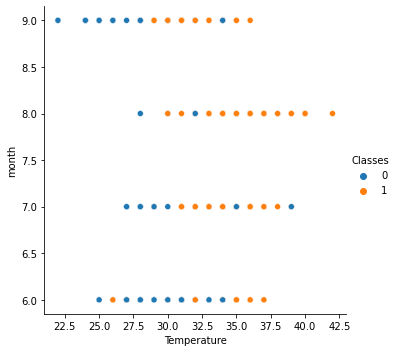

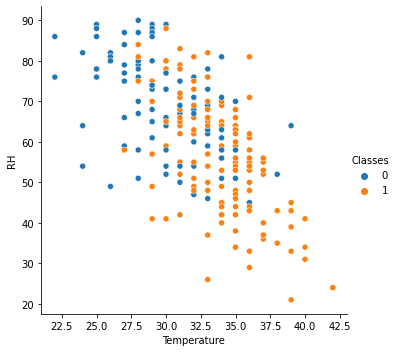

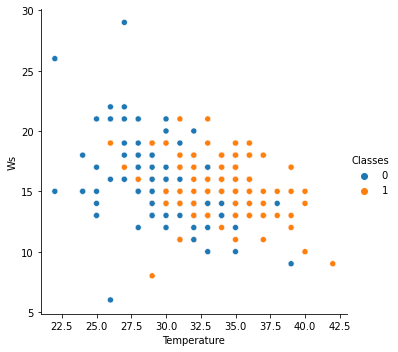

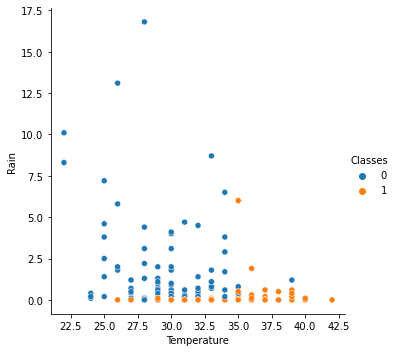

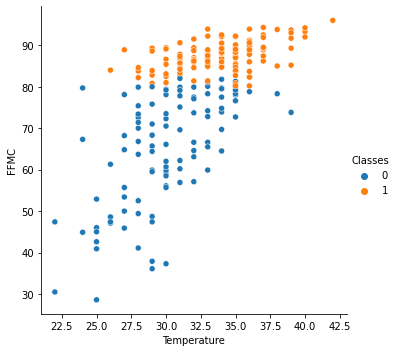

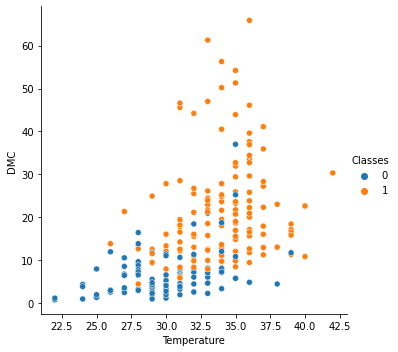

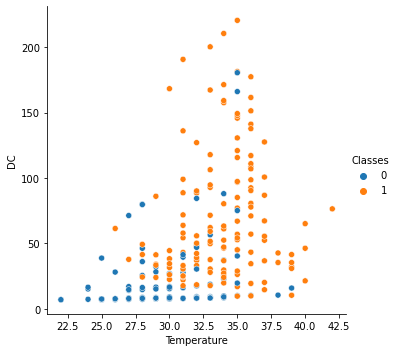

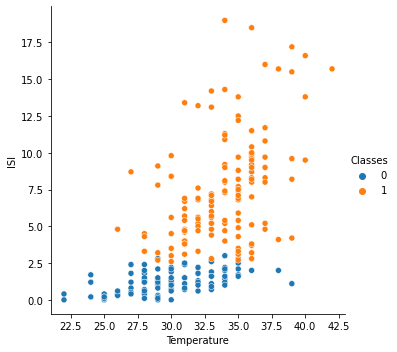

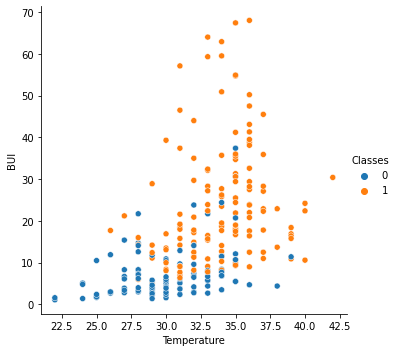

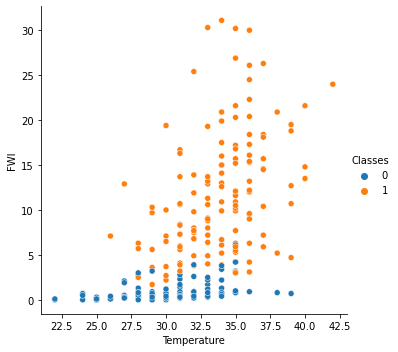

In [20]:
[i if i in ['Temperature','Classes'] else sns.relplot(x='Temperature',y=i,hue='Classes',data=new_df) for i in new_df]
#sns.relplot(x='Temperature',y='RH',hue='Class',data=new_df)

# OBSERVATIONS :

1. Temperature vs RH : Inveresely proportional.High temp. tends to prone to fire viceversa.
2. Temperature vs Ws : Inveresely proportional(somewhat).Some outliers are observed.
3. Temperature vs Rain : no proper relation.If rain is present on a particular day it is not prone to fire.
4. Temperature vs FFMC : directly proportional. We can clearly see CLUSTER is formed high ffmc prone to fire.
5. Temperature vs DMC : linear relationship but some outlers are observed.
6. Temperature vs DC : no linear relation(somewhat curve observed) and outliers are present.
7. Temperature vs ISI : directly proportional. ISI > 3.5 more prone to fire because it refers to spread index of fire.
8. Temperature vs BUI : directly proportional.outliers are observed.
9. Temperature vs FWI : directly proportional.outliers are observed.0<FWI< 5 having high frequency and more prone to (not fire).


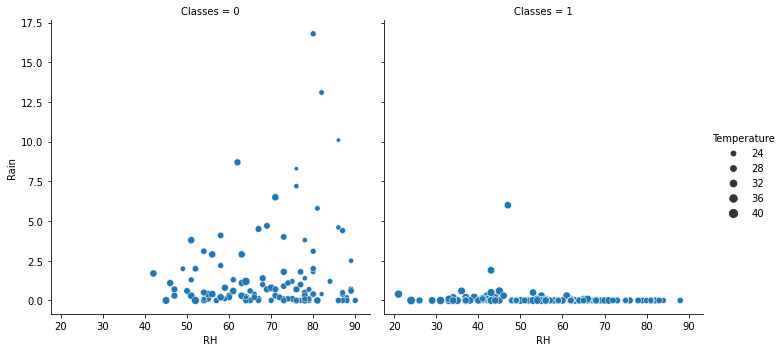

In [21]:
sns.relplot(x='RH',y='Rain',col='Classes',data=new_df,size='Temperature')
# relative humidity > 40 and rain > 2.5 then it will to tend to no fire zone(class 0).
#Outliers are observed in rain.

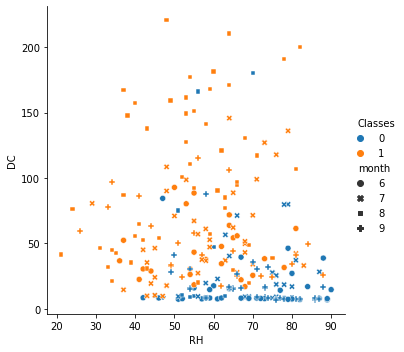

In [22]:
sns.relplot(x='RH',y='DC',hue='Classes',data=new_df,style='month')
# Drought Code grater than 100 and month = 8 is prone to fire(Class 1) or with less RH(< 40) 

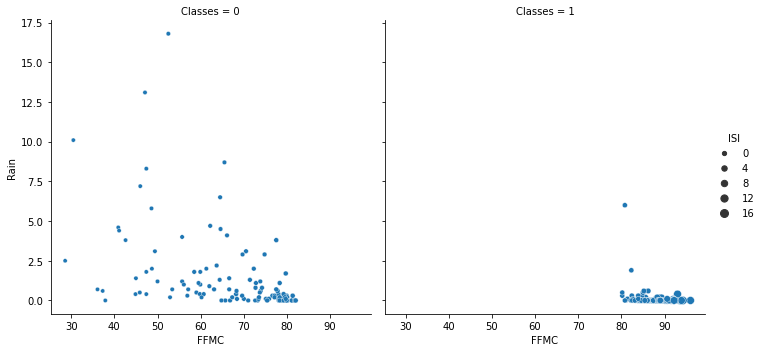

In [23]:
sns.relplot(x='FFMC',y='Rain',col='Classes',data=new_df,size='ISI')
# if ffmc is > 80 even it is rain or not it is prone to fire.

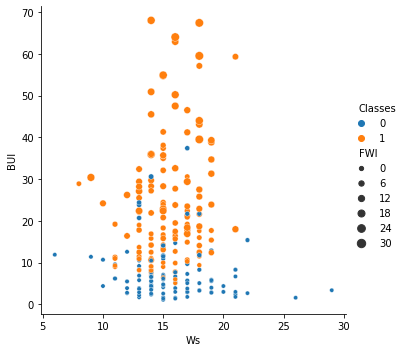

In [24]:
sns.relplot(x='Ws',y='BUI',hue='Classes',data=new_df,size='FWI')
# wind speed between 10 to 22 and bui > 15 tends to fire(class 1).

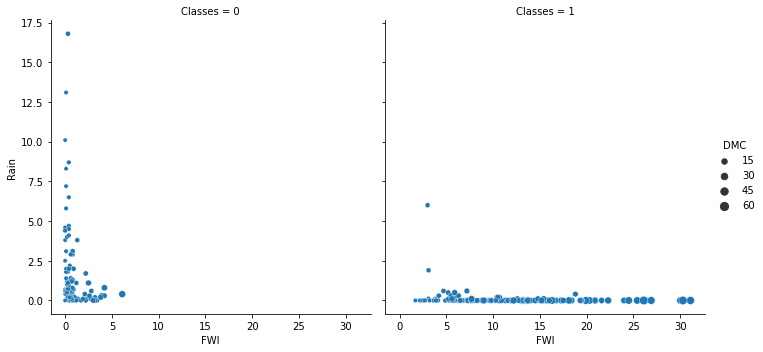

In [25]:
sns.relplot(x='FWI',y='Rain',col='Classes',data=new_df,size='DMC')
# if rain is 0 and fwi less than < 7 it is prone to no fire(class 0).

In [26]:
percentage = new_df.Classes.value_counts(normalize=True)*100
percentage

1    56.557377
0    43.442623
Name: Classes, dtype: float64

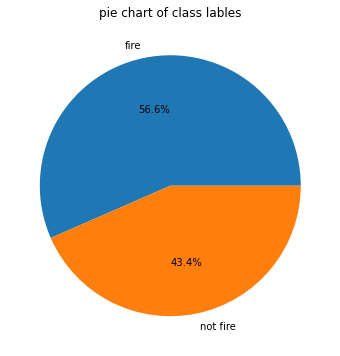

In [27]:
# class unique values with percentage 
plt.figure(figsize=(10,6))
plt.pie(percentage,labels=['fire', 'not fire'], autopct='%1.1f%%')
plt.title("pie chart of class lables")
plt.show()

# Handling Outliers

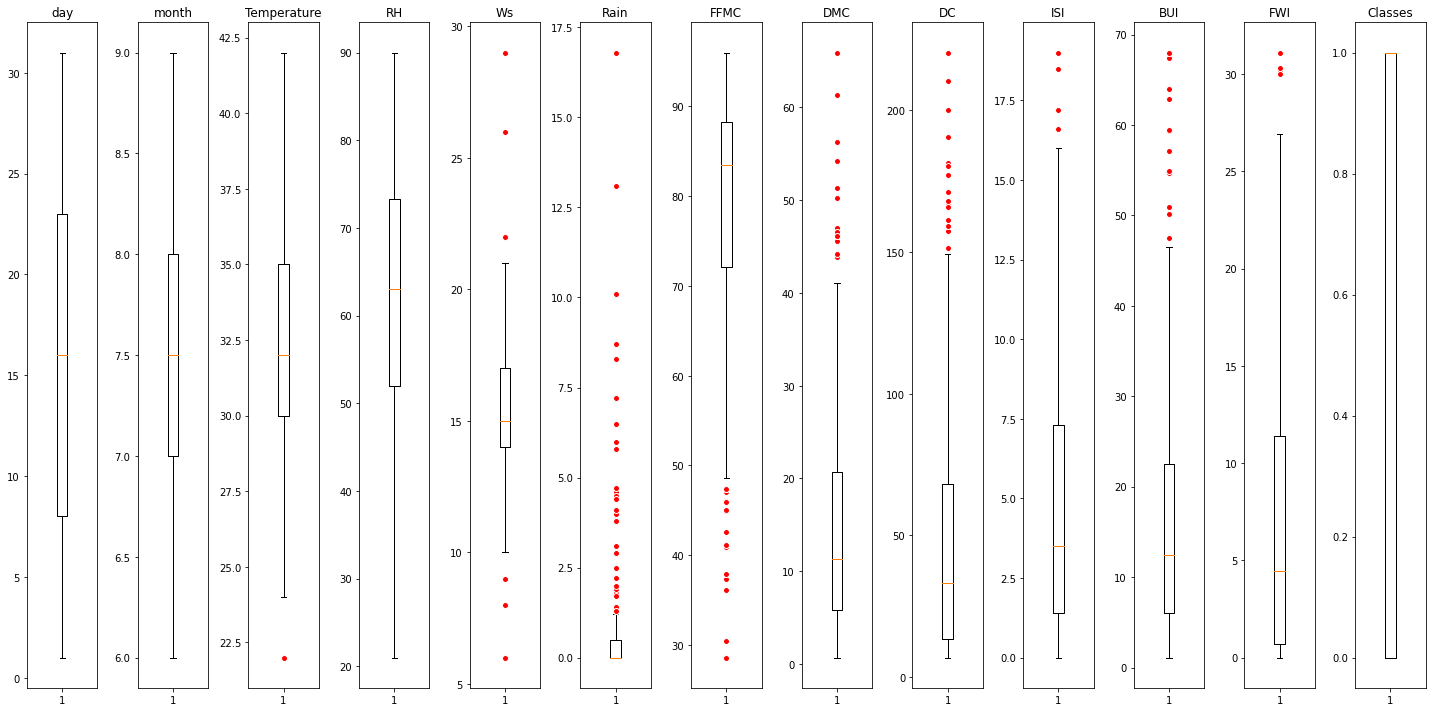

In [28]:
red_circle = {'markerfacecolor':'red', 'marker':'o', 'markeredgecolor':'white'}
fig, axs = plt.subplots(1,len(new_df.columns),figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(new_df.iloc[:,i],flierprops=red_circle)
    ax.set_title(new_df.columns[i])
plt.tight_layout()

In [29]:
def outlier_detection_Gaussian(data,variable):
    #outlier = sns.boxplot(x=variable,data=new_df)
    upper_limit = data[variable].mean() + 3*new_df[variable].std()
    lower_limit = data[variable].mean() - 3*new_df[variable].std()
    print('upper limit',upper_limit)
    print('lower limit',lower_limit)
    new_data = data[data[variable] > upper_limit]
    new_data1 = data[data[variable] < lower_limit]
    outlier_count = new_data.shape[0]+new_data1.shape[0]
    if outlier_count > 1:
        data.loc[data[variable] > upper_limit, variable] = upper_limit 
        # replacing outliers with upperlimit
        data.loc[data[variable] < lower_limit, variable] = lower_limit 
        # replacing outliers with lowerlimit
    no_outlier = sns.boxplot(x=variable,data=data) 
    # no outliers i.e boxplot after handling outliers
    return f"Total number of outliers are {outlier_count},figure with no outliers{no_outlier}"

In [30]:
def handling_outlier_skewed(data,variable):
    """
    This function is used calculate upper and lower limits for skewed distribution for handling outliers.
    """
    #outlier = sns.boxplot(x=variable,data=new_df)
    Q1_percentile = data[variable].quantile(0.25) # 25th percentile
    Q3_percentile = data[variable].quantile(0.75) # # 75th percentile
    IQR = Q3_percentile - Q1_percentile # calculation of Inter quartile range
    lower_limit = Q1_percentile - 1.5 * IQR
    upper_limit = Q3_percentile + 1.5 * IQR
    print('upper limit',upper_limit)
    print('lower limit',lower_limit)
    new_data = data[data[variable] > upper_limit]
    new_data1 = data[data[variable] < lower_limit]
    outlier_count = new_data.shape[0]+new_data1.shape[0]
    if outlier_count > 1:
        data.loc[data[variable] > upper_limit, variable] = upper_limit # replacing outliers with upperlimit
        data.loc[data[variable] < lower_limit, variable] = lower_limit # replacing outliers with lowerlimit
    no_outlier = sns.boxplot(x=variable,data=data)  # no outliers i.e boxplot after handling outliers
    return f"Total number of outliers are {outlier_count},figure with no outliers{no_outlier}"

upper limit 23.934633473146445
lower limit 7.07356324816503


'Total number of outliers are 3,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

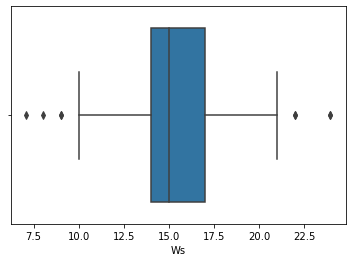

In [31]:
outlier_detection_Gaussian(data=new_df,variable='Ws')
# outliers greater than upperlimit are replaced with upperlimit and lesser than lower limit
# replaced with lower limit.
# in figure still outliers are showing because we consider boundary limits with mulitple of 3

upper limit 43.073660927726394
lower limit 21.270601367355567


'Total number of outliers are 0,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

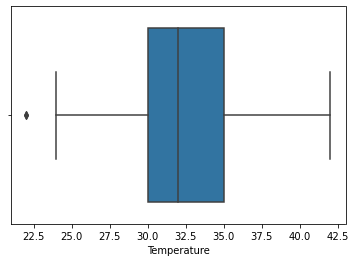

In [32]:
outlier_detection_Gaussian(data=new_df,variable='Temperature')
# outliers greater than upperlimit are replaced with upperlimit and lesser than lower limit
# replaced with lower limit.
# in figure still outliers are showing because in boxplot it will consider(3*IQR) where as in guassian
# distribution the boundary limits are (mean + or - 3*std).

upper limit 1.25
lower limit -0.75


'Total number of outliers are 35,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

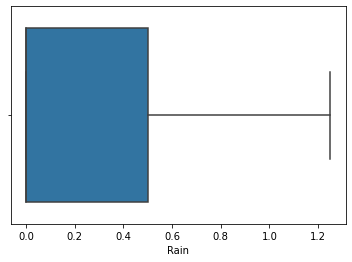

In [33]:
handling_outlier_skewed(data=new_df,variable='Rain')
# 23 outliers are replaced with upperlimit.

upper limit 112.63749999999999
lower limit 47.73750000000001


'Total number of outliers are 16,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

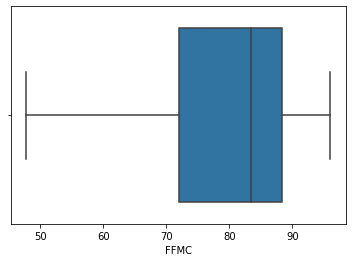

In [34]:
handling_outlier_skewed(data=new_df,variable='FFMC')
# most of the outliers are having left skewed distribution hence handled with lower limit.

upper limit 16.150000000000002
lower limit -7.450000000000001


'Total number of outliers are 4,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

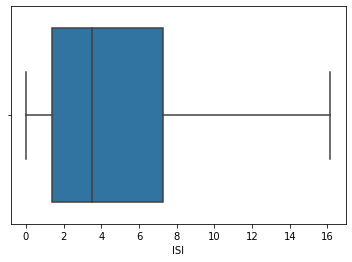

In [35]:
handling_outlier_skewed(data=new_df,variable='ISI')
# most of the outliers are present in right side of distribution hence handled with upper limit.

upper limit 43.175
lower limit -16.624999999999996


'Total number of outliers are 12,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

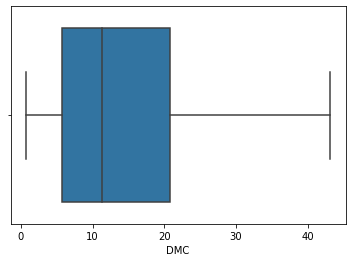

In [36]:
handling_outlier_skewed(data=new_df,variable='DMC')
# most of the outliers are present in right side of distribution hence handled with upper limit.

upper limit 150.46250000000003
lower limit -69.03750000000002


'Total number of outliers are 15,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

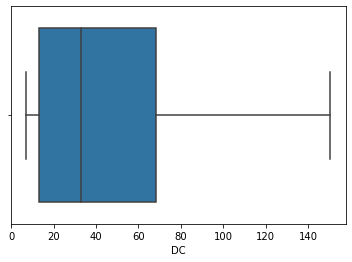

In [37]:
handling_outlier_skewed(data=new_df,variable='DC')
# most of the outliers are present in right side of distribution hence handled with upper limit.

upper limit 47.3125
lower limit -18.787499999999998


'Total number of outliers are 12,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

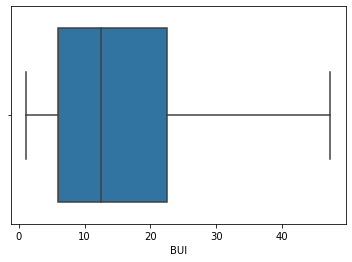

In [38]:
handling_outlier_skewed(data=new_df,variable='BUI')
# most of the outliers are present in right side of distribution hence handled with upper limit.

upper limit 27.387500000000003
lower limit -15.312500000000004


'Total number of outliers are 4,figure with no outliersAxesSubplot(0.125,0.125;0.775x0.755)'

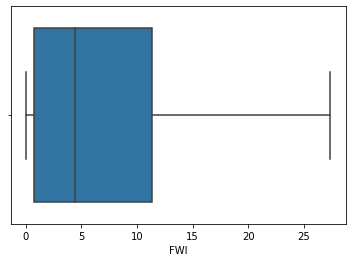

In [39]:
handling_outlier_skewed(data=new_df,variable='FWI')
# most of the outliers are present in right side of distribution hence handled with upper limit.

# Feature Selection

<AxesSubplot:>

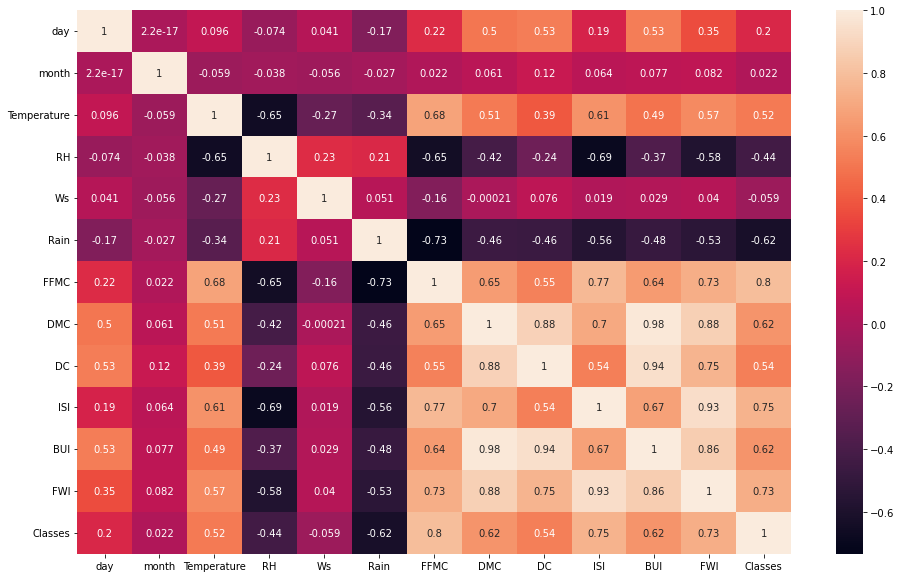

In [40]:
# feature selection using correlation
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(),annot=True)

In [41]:
# finding the features which are highly correlated 
def multicolinearity(data, threshold):
    """
    This function will return columns name which are highly correlated/multicolinearity.
    """
    
    unique_columns = set()
    matrix = new_df.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                column = matrix.columns[i]
                unique_columns.add(column)
    return unique_columns

In [42]:
multicolinearity(data=new_df, threshold=0.85)

{'BUI', 'DC', 'FWI'}

# Observations :
1.Rain and RH are having negative correlation with target variable. 2. Temperature, FFMC, DMC, DC, ISI, BUI, FWI are having corr > 0.50 with target variable 3. BUI, DC, FWI are having muliticolinearity hence dropping them 4. day, month and ws having less correlation with dependant variable hence droping it.
    so finally Temperature, Rain, RH, FFMC, DMC and ISI are selecting as final features.

In [43]:
# dropping columns for training the model
new_df.drop(columns=['day','month','Ws','DC','FWI','BUI'],inplace=True)

In [44]:
# dependant variable for training the model
y = new_df.iloc[:,-1]

In [45]:
#  indepenant variables without standardscalar or transformation
X = new_df.iloc[:,:-1]
X

,Temperature,RH,Rain,FFMC,DMC,ISI
0,29,57,0.00,65.7000,3.400,1.30
1,29,61,1.25,64.4000,4.100,1.00
2,26,82,1.25,47.7375,2.500,0.30
3,25,89,1.25,47.7375,1.300,0.00
4,27,77,0.00,64.8000,3.000,1.20
5,31,67,0.00,82.6000,5.800,3.10
6,33,54,0.00,88.2000,9.900,6.40
7,30,73,0.00,86.6000,12.100,5.60
8,25,88,0.20,52.9000,7.900,0.40
9,28,79,0.00,73.2000,9.500,1.30


# Model Building

In [46]:
# spliting the data into training and test sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X,y,test_size=0.3,
                                                                        random_state=30)

In [47]:
cv = StratifiedKFold(n_splits=5,shuffle=False)

In [48]:
def scaler_standard(X_train, X_test):
    """
    This function will scale the data.
    """
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [49]:
X_train_scaled, X_test_scaled = scaler_standard(X_train = X_train_data, X_test = X_test_data)

Text(0.5, 1.0, 'X_train After Scaling')

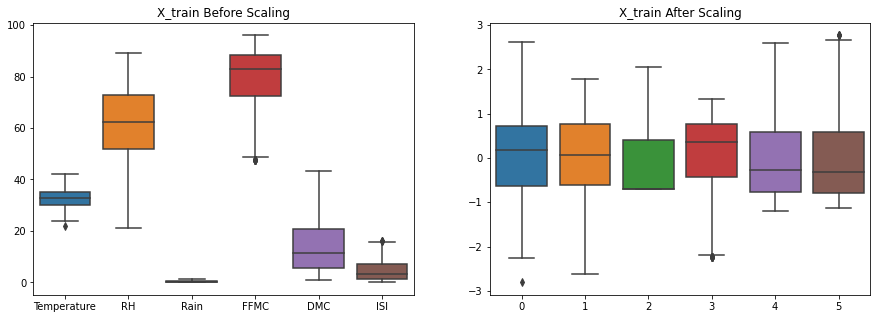

In [50]:
# Box plot the dataset to understand effect of standard scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_data)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [51]:
def model_training(X_train, y_train, X_test, y_test, model):
    """
    This function will give you classification report, confusion matrix, ROC and AUC curve.
    """
    # training the model using train data
    training = model.fit(X_train,y_train)
    # prediction on test data started
    predictions = training.predict(X_test)
    predictions_prob = training.predict_proba(X_test)
    # prediction probabilities stored
    fpr, tpr, thresh = roc_curve(y_test,predictions_prob[:,1])
    print('threshold: {}'.format(thresh))
    # fpr and tpr values are using from results of roc_curve
    roc_auc = auc(fpr, tpr)
    # plotting the results of roc and auc curve
    plt.plot(fpr, tpr, color='green', label = r'ROC (AUC= %0.2f )' % (roc_auc),
        alpha=1, lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="best")
    plt.title('ROC and AUC')
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))

threshold: [1.99999743e+00 9.99997426e-01 5.33737256e-01 4.97888128e-01
 4.63669642e-01 4.18968818e-01 3.19227889e-01 2.33531873e-05]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.98      0.91      0.94        44

    accuracy                           0.93        74
   macro avg       0.93      0.94      0.93        74
weighted avg       0.94      0.93      0.93        74

[[29  1]
 [ 4 40]]


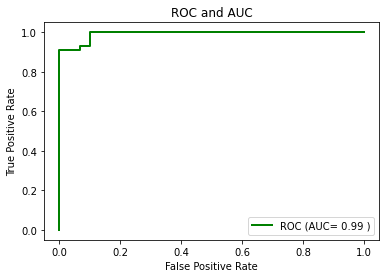

In [52]:
# calling the function using LogisticRegression

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=LogisticRegression())

# True positives are important for this problem
# high precision and recall is there but accuracy is less as compared to other models

threshold: [2.   1.   0.99 0.98 0.56 0.36 0.34 0.09 0.07 0.06 0.01 0.  ]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        44

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74

[[30  0]
 [ 2 42]]


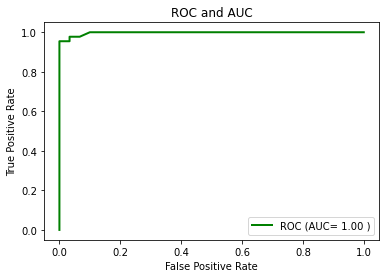

In [53]:
# calling the function using RandomForestClassifier

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=RandomForestClassifier())

threshold: [2. 1. 0.]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.98      0.95      0.97        44

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

[[29  1]
 [ 2 42]]


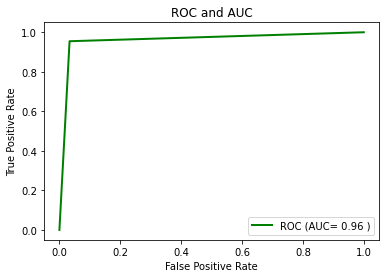

In [54]:
# calling the function using DecisionTreeClassifier

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=DecisionTreeClassifier())

threshold: [2.00000000e+00 1.00000000e+00 8.36470880e-01 7.44959152e-01
 6.40102121e-01 3.23972622e-01 4.86610602e-02 3.59941782e-08
 1.55464774e-08 4.10202558e-45]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.95      0.91      0.93        44

    accuracy                           0.92        74
   macro avg       0.91      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74

[[28  2]
 [ 4 40]]


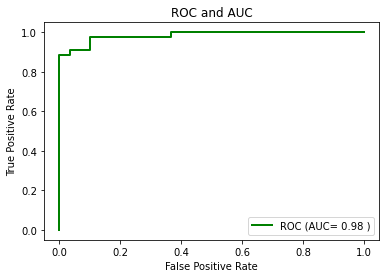

In [55]:
# calling the function using GaussianNB

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=GaussianNB())

threshold: [1.99999764e+00 9.99997642e-01 7.97029421e-01 5.00000000e-01
 4.89741487e-01 4.78988420e-01 4.02878120e-01 1.71017472e-01
 1.15278177e-03]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.95      0.91      0.93        44

    accuracy                           0.92        74
   macro avg       0.91      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74

[[28  2]
 [ 4 40]]


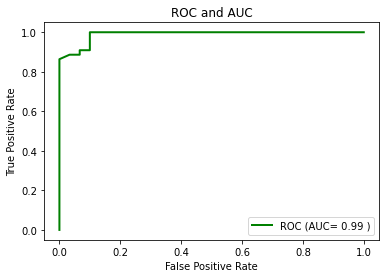

In [56]:
# calling the function using SVC
model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=SVC(probability=True))

threshold: [1.9962313  0.99623126 0.9956175  0.9950943  0.99130344 0.99100924
 0.62711257 0.38373098 0.25281352 0.01993661 0.01654429 0.00591976
 0.00490056]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        44

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74

[[30  0]
 [ 2 42]]


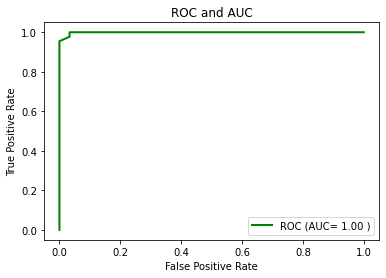

In [57]:
# calling the function using XGBClassifier

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=xg.XGBClassifier())

threshold: [1.99998072e+00 9.99980722e-01 9.99980123e-01 9.99979222e-01
 9.99930703e-01 9.99443685e-01 1.09630008e-04 2.69626769e-05
 2.42141630e-05 2.18037719e-05]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.98      0.95      0.97        44

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

[[29  1]
 [ 2 42]]


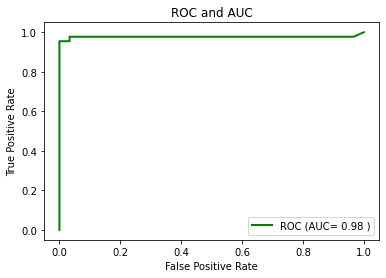

In [58]:
# calling the function using GradientBoostingClassifier

model_training(X_train=X_train_scaled,y_train=y_train_data, 
               X_test=X_test_scaled, y_test=y_test_data, model=GradientBoostingClassifier())

# Selection of Model
1. High precision and recall with high accuracy.
2. Area under curve is near to 1.
3. Hence selecting XgBoostClassifier as final model

# Hyper Parameter Optimization

In [59]:
# hyperparameter tuning for xgClassifier
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.30,],
    'max_depth':[3,4,5,6,8,10,12,14,18],
    'min_child_weight':[1,3,5,7,9],
    'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [60]:
# creating object of xg boost classifier
classifier = xg.XGBClassifier()

In [61]:
# using randomized searchcv for hyperparameter tuning
random_search = RandomizedSearchCV(classifier,param_distributions=params,scoring='roc_auc',
                   n_jobs=-1,cv=5,verbose=3,n_iter=5)

In [62]:
# training using Random searchcv
random_search.fit(X_train_scaled, y_train_data)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [63]:
# best parameters
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [64]:
# best estimator
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
# final xg.Classifier taking parameters from best estimator
final_classifier = xg.XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bytree=0.7,gamma=0.4,
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,n_estimators=100,n_jobs=0, num_parallel_tree=1, predictor='auto', 
              random_state=0,reg_alpha=0, reg_lambda=1,scale_pos_weight=1, 
                                    seed=None, silent=True,subsample=1)

In [75]:
# training on final_classifer
final_classifier.fit(X_train_scaled,y_train_data)

[10:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
# predictions on test data
final_prdicitons = final_classifier.predict(X_test_scaled)

In [77]:
# probabilites of test data for roc curve
final_prdicitons_prob = final_classifier.predict_proba(X_test_scaled)

In [78]:
# by applying Randomized searchCV we didnot find any change in result
print(classification_report(y_test_data,final_prdicitons))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        44

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74



[1.9562013  0.9562013  0.93694216 0.53892076 0.49830133 0.19972888
 0.08034001 0.05611866]


Text(0.5, 1.0, 'ROC and AUC')

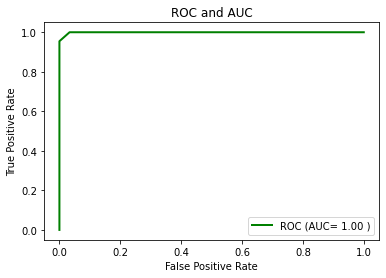

In [79]:
# plotting the roc and auc curve
fpr, tpr, thresh = roc_curve(y_test_data,final_prdicitons_prob[:,1])
print(thresh)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', label = r'ROC (AUC= %0.2f )' % (roc_auc),alpha=1, lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC and AUC')

<AxesSubplot:>

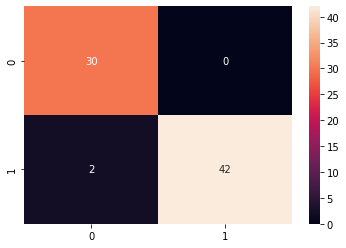

In [90]:
# confusion matrix for final XG.Classifier
sns.heatmap(confusion_matrix(y_test_data, final_prdicitons),annot=True)

In [91]:
# using pickle model is dumped into file
pickle.dump(final_classifier, open('model_xg.pkl', 'wb'))

In [94]:
# testing of model with the help of single sample
dict_test ={'Temperature':30,'RH':50, 'Rain':2, 'FFMC':6,
       'DMC':7, 'ISI':10}

In [95]:
list(dict_test.values())

[30, 50, 2, 6, 7, 10]

In [96]:
input_data = [np.array(list(dict_test.values()))]
input_data

[array([30, 50,  2,  6,  7, 10])]

In [97]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data)
print(scaled_data)

[[0. 0. 0. 0. 0. 0.]]


In [98]:
pickle_model = pickle.load(open('model_xg.pkl','rb'))

In [99]:
pickle_model.predict(scaled_data)[0]
# fire prediction

1